In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from mpl_toolkits.mplot3d import Axes3D

In [8]:
np.fliplr(np.identity(2))

array([[0., 1.],
       [1., 0.]])

In [9]:
def plot_bivariate_Normal(rho=0, type='contour', pdf=True):
    mean = [0, 0]
    cov_zero = np.identity(2)
    anti_diag = np.fliplr(np.identity(2))
    cov_pos = cov_zero + rho*anti_diag
    cov_neg = cov_zero - rho*anti_diag
    
    x = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, x)
    if pdf:
        data = [
            stats.multivariate_normal(mean, cov_neg).pdf(np.dstack((X, Y))),
            stats.multivariate_normal(mean, cov_zero).pdf(np.dstack((X, Y))),
            stats.multivariate_normal(mean, cov_pos).pdf(np.dstack((X, Y)))
        ]
    else:
        data = [
            stats.multivariate_normal(mean, cov_neg).cdf(np.dstack((X, Y))),
            stats.multivariate_normal(mean, cov_zero).cdf(np.dstack((X, Y))),
            stats.multivariate_normal(mean, cov_pos).cdf(np.dstack((X, Y)))
        ]
    titles = [
        fr"negative correlation $\rho$ = {-rho}",
        "uncorrelated",
        fr"positive correlation $\rho$ = {rho}"
    ]

    cmap_name = 'inferno'
    kw_dict = {'aspect': 'equal'}
    if type in ['surface', 'contour3d']:
        kw_dict['projection'] = '3d'
        
    fig, axs = plt.subplots(1, 3, figsize=(18, 7), subplot_kw=kw_dict)
    for ax, Z, title in zip(axs, data, titles):
        match type:
            case 'contour':
                cs = ax.contour(X, Y, Z, cmap=cmap_name)
                ax.clabel(cs)
            case 'contourf':
                cs = ax.contourf(X, Y, Z, cmap=cmap_name)
            case 'surface':
                ax.plot_surface(X, Y, Z, rcount=25, ccount=25, linewidth=0.2, cmap=cmap_name)
            case 'contour3d':
                ax.contour(X, Y, Z, cmap=cmap_name)        
        ax.set_title(title)
    if type=='contourf':
        fig.subplots_adjust(right=0.95)
        cbar_ax = fig.add_axes([0.975, 0.2, 0.025, 0.6])
        cbar = fig.colorbar(cs, cax=cbar_ax)


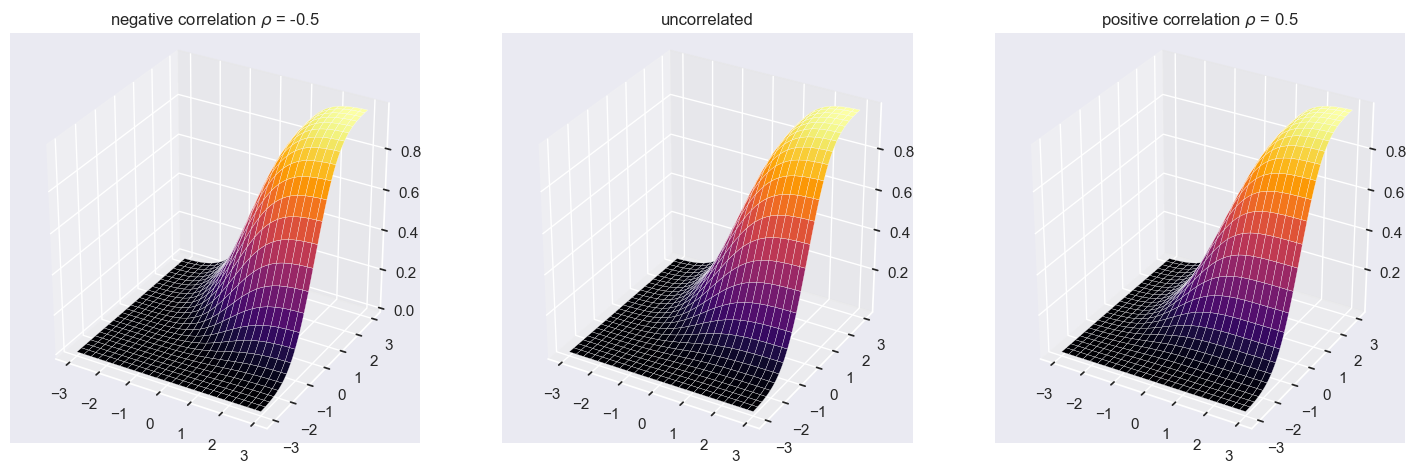

In [10]:
plot_bivariate_Normal(rho=.5, type='surface', pdf=False)

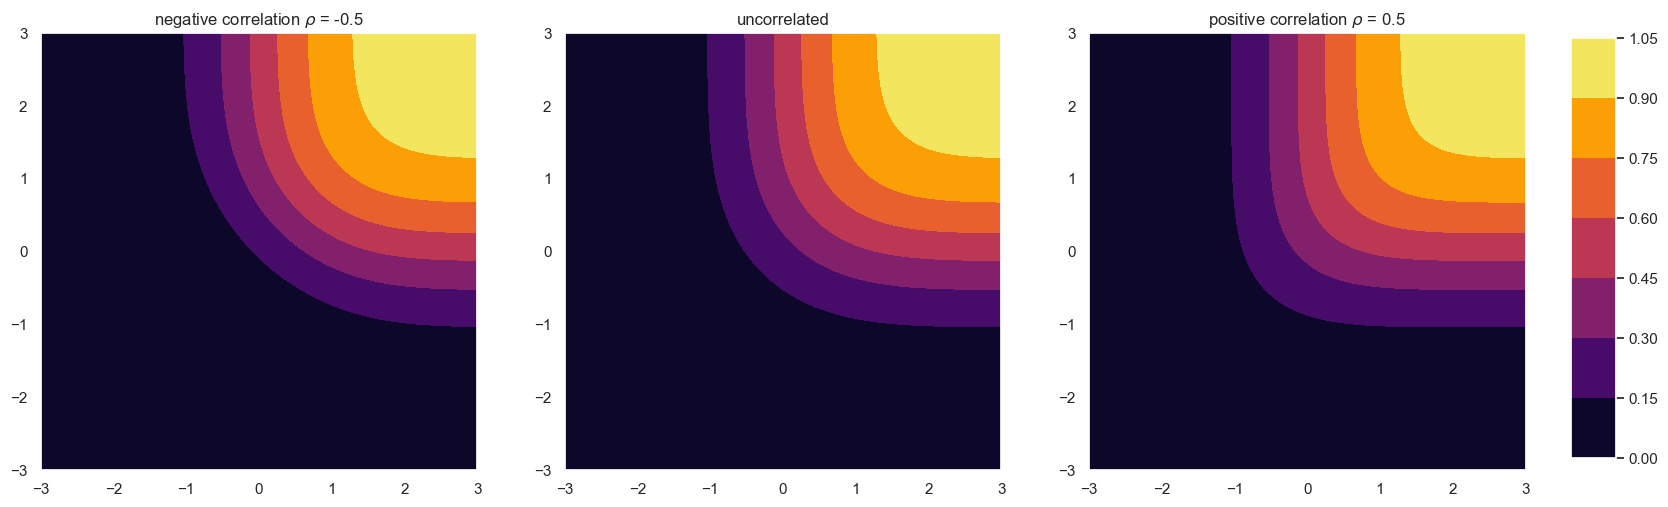

In [11]:
plot_bivariate_Normal(rho=.5, type='contourf', pdf=False)

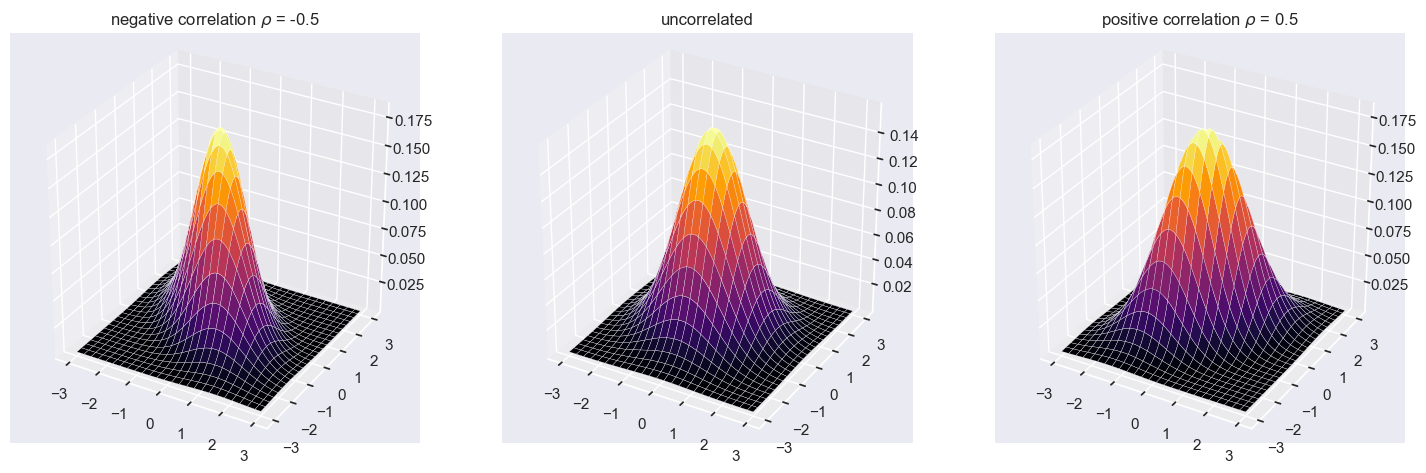

In [12]:
plot_bivariate_Normal(rho=.5, type='surface')

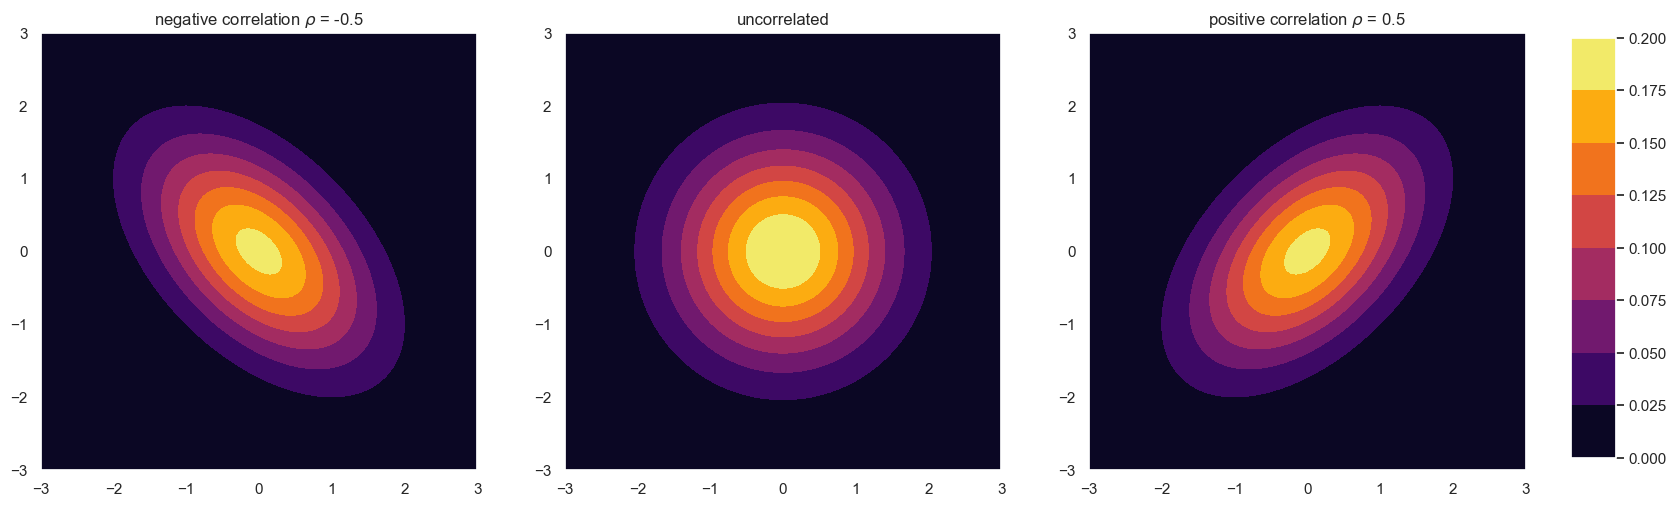

In [13]:
plot_bivariate_Normal(rho=.5, type='contourf')

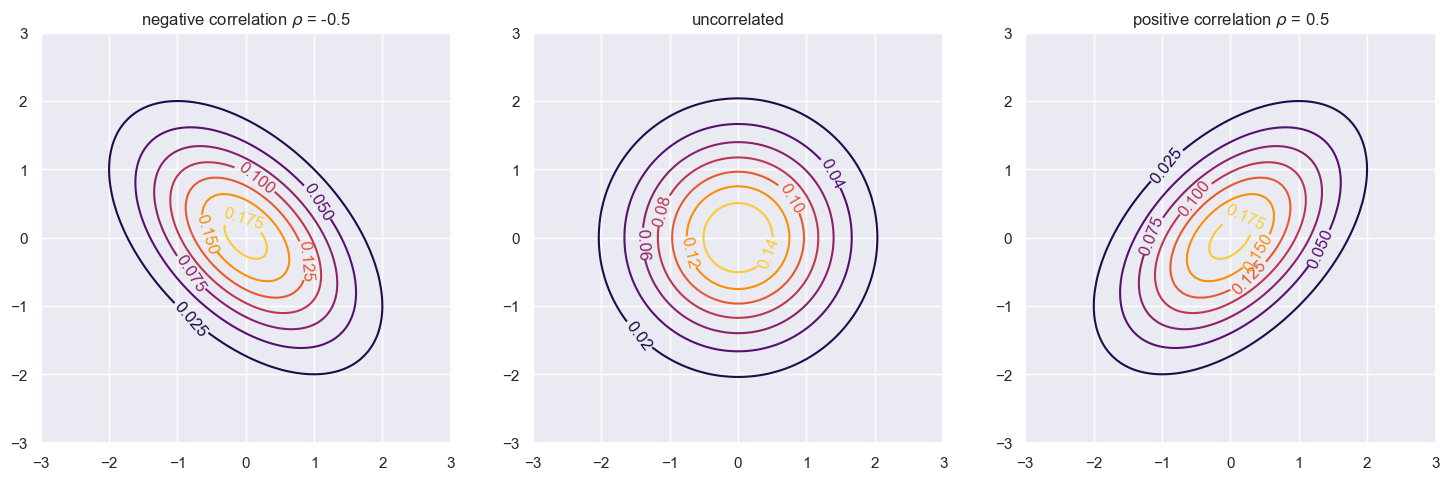

In [14]:
plot_bivariate_Normal(rho=.5)

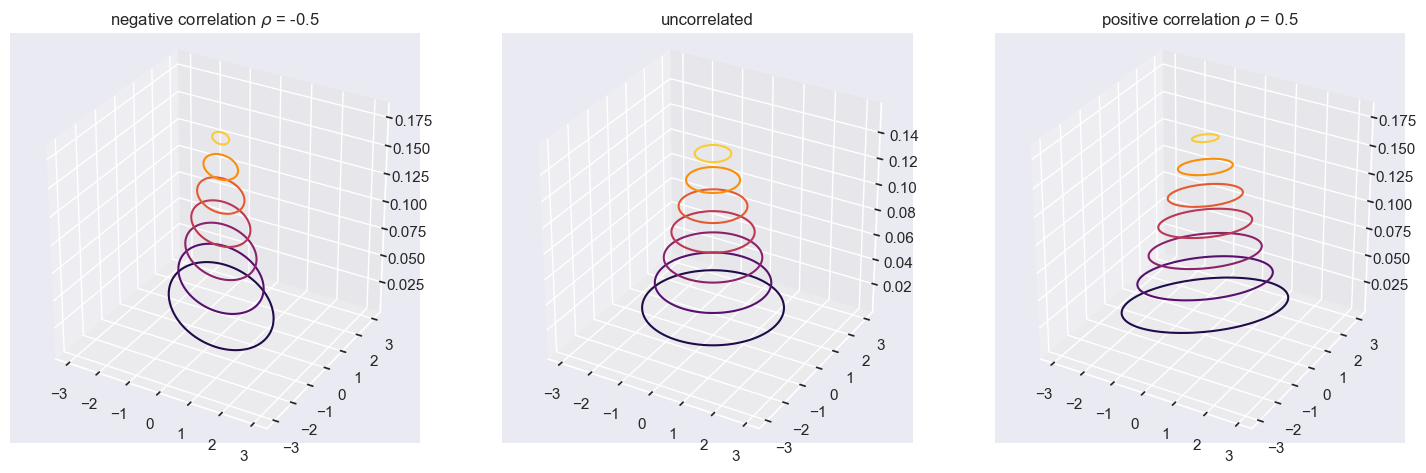

In [15]:
plot_bivariate_Normal(rho=.5, type='contour3d')